## Projeto Final: Detecção de Fraudes em Transações Financeiras

1. Introdução
Bem-vindos ao projeto de detecção de fraudes em transações financeiras!  Nosso objetivo principal é desenvolver um modelo inteligente, utilizando algoritmos avançados de machine learning, capaz de identificar transações fraudulentas a partir de um conjunto de dados realista.

A **fraude financeira** tem se tornado um problema crescente, e a necessidade de soluções automatizadas para identificar padrões suspeitos em grandes volumes de dados é crucial. Este projeto se concentrará em abordar desafios específicos, como o tratamento de dados desbalanceados, a aplicação de algoritmos de classificação e a utilização de técnicas robustas de validação para garantir a performance do nosso modelo.


Nosso trabalho resultará em um modelo eficaz na identificação de fraudes, e também em um relatório detalhado com gráficos e métricas que explicam seu desempenho de forma clara e compreensível, mesmo para um público menos técnico.

### Import das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import plotly.express as px
import plotly.graph_objects as go

# Configurações para melhor visualização dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Carregamento do Conjunto de Dados

In [4]:
try:
    df = pd.read_csv('/content/drive/MyDrive/dscience-infinity/Projeto Final/creditcard.csv')
    print("Dataset carregado com sucesso!")
    print(f"Número de linhas: {df.shape[0]}")
    print(f"Número de colunas: {df.shape[1]}")
except FileNotFoundError:
    print("Erro: O arquivo 'creditcard.csv' não foi encontrado. Por favor, certifique-se de que o arquivo está no diretório correto.")


Dataset carregado com sucesso!
Número de linhas: 284807
Número de colunas: 31


## 3. Análise Exploratória de Dados (EDA)
A Análise Exploratória de Dados (EDA) é uma etapa crucial para entender as características do nosso dataset. Vamos identificar padrões gerais, anomalias e possíveis correlações entre as variáveis.

#### 3.1. Visão Geral dos Dados
observando as primeiras linhas do dataset, suas informações gerais e estatísticas descritivas.

In [5]:
print("\n--- Primeiras 5 linhas do dataset ---")
print(df.head())




--- Primeiras 5 linhas do dataset ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.2060

In [6]:
print("\n--- Informações gerais do dataset ---")
df.info()




--- Informações gerais do dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     2

In [7]:
print("\n--- Estatísticas descritivas do dataset das variáveis numéricas---")
print(df.describe())


--- Estatísticas descritivas do dataset das variáveis numéricas---
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.21

###### 3.2. Verificação de Valores Ausentes
verificar se existem valores ausentes no dataset, pois isso pode impactar a qualidade do nosso modelo.

In [8]:
print("\n--- Verificação de valores ausentes ---")
print(df.isnull().sum().sort_values(ascending=False))

if df.isnull().sum().sum() == 0:
    print("\nNão há valores ausentes no dataset.")
else:
    print("\nExistem valores ausentes. O tratamento será necessário.")



--- Verificação de valores ausentes ---
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Não há valores ausentes no dataset.


##3.3. Distribuição das Classes (Fraude vs. Normal)
analisar o quão desbalanceadas são as classes de transações fraudulentas e normais.

**Observação** -> Esta é uma informação crítica para as próximas etapas do projeto.

In [10]:
# Visualização da distribuição das classes através de um gráfico de barras
class_dist = df['Class'].value_counts().reset_index()
class_dist.columns = ['tipo_transacao', 'contagem']

fig = px.bar(class_dist,
             x='tipo_transacao',
             y='contagem',
             color='tipo_transacao',
             color_discrete_map={0: 'blue', 1: 'red'},
             labels={
                 'tipo_transacao': 'Tipo de Transação',
                 'contagem': 'Número de Transações'
             },
             title='Distribuição de Transações (Normal vs. Fraude)')

fig.update_layout(
    xaxis_title="0: Transação Normal | 1: Transação Fraudulenta",
    yaxis_title="Contagem"
)

fig.show()

**Análise**, o número de transações fraudulentas é significativamente menor do que o número de transações normais, confirmando o desequilíbrio de classes.

## 3.4. Análise da Variável 'Time'

A variável 'Time' representa o tempo decorrido entre a primeira transação e as subsequentes.

Vamos ver sua distribuição.

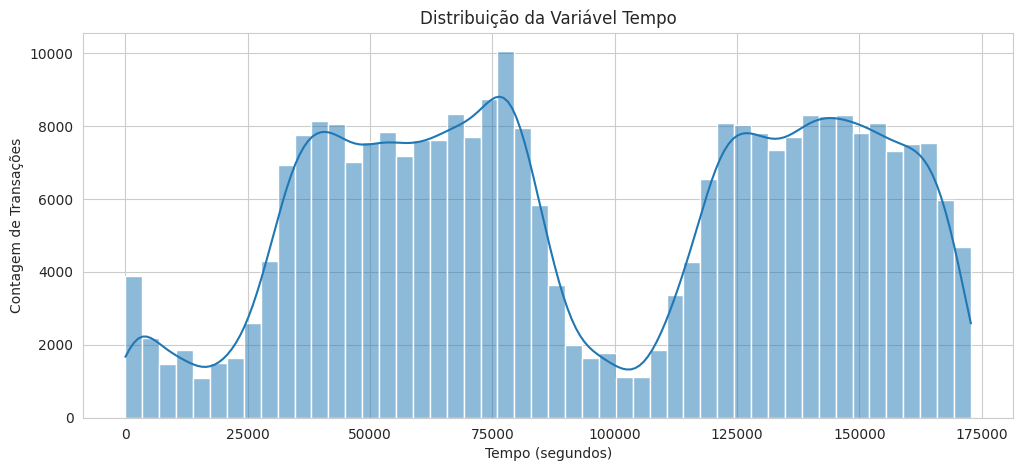

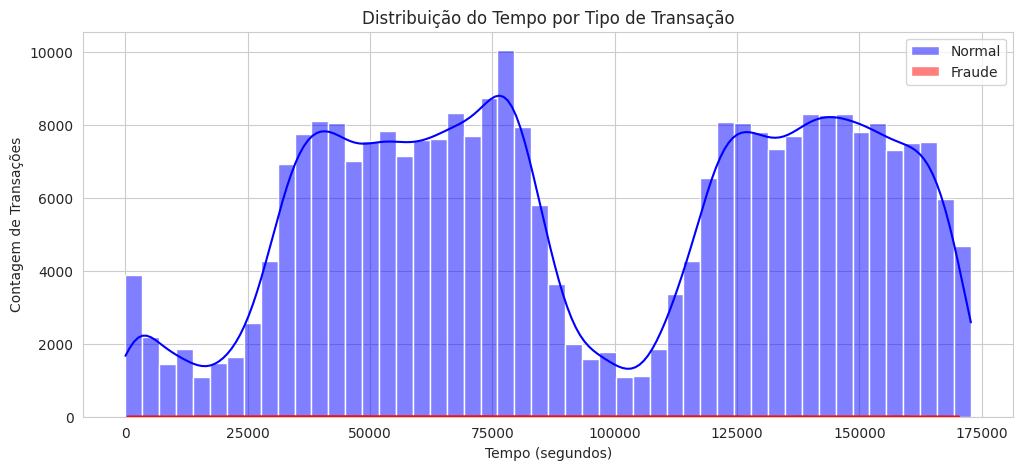

In [11]:
plt.figure(figsize=(12, 5))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribuição da Variável Tempo')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Contagem de Transações')
plt.show()

# Análise do tempo para transações fraudulentas vs. normais
plt.figure(figsize=(12, 5))
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, kde=True, color='blue', label='Normal')
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, kde=True, color='red', label='Fraude')
plt.title('Distribuição do Tempo por Tipo de Transação')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Contagem de Transações')
plt.legend()
plt.show()

### 3.5. Análise da Variável 'Amount'
A variável 'Amount' representa o valor da transação. Vamos analisar sua distribuição e como se relaciona com as fraudes.

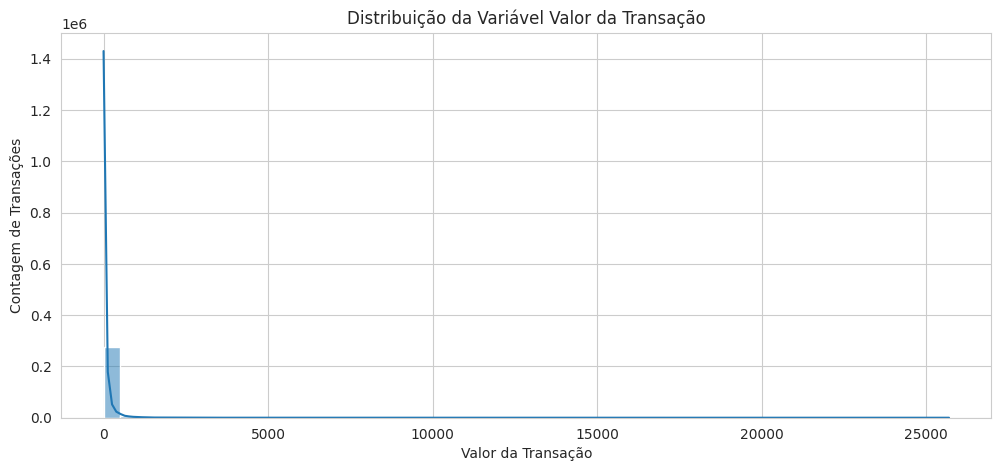

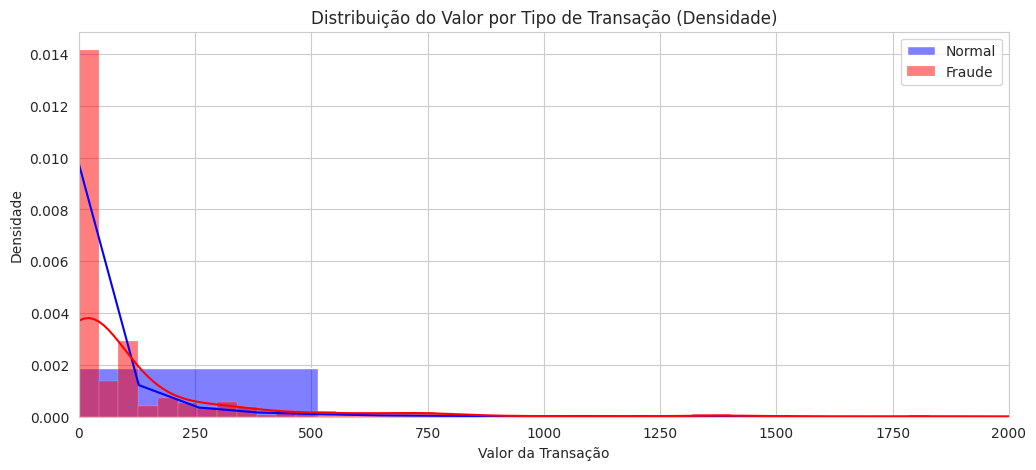


--- Estatísticas descritivas do valor para transações fraudulentas ---
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

--- Estatísticas descritivas do valor para transações normais ---
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [12]:
plt.figure(figsize=(12, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribuição da Variável Valor da Transação')
plt.xlabel('Valor da Transação')
plt.ylabel('Contagem de Transações')
plt.show()

# Análise do valor para transações fraudulentas vs. normais
plt.figure(figsize=(12, 5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Normal', stat='density')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Fraude', stat='density')
plt.title('Distribuição do Valor por Tipo de Transação (Densidade)')
plt.xlabel('Valor da Transação')
plt.ylabel('Densidade')
plt.legend()
plt.xlim(0, 2000) # Focando em valores menores para melhor visualização das fraudes
plt.show()

print("\n--- Estatísticas descritivas do valor para transações fraudulentas ---")
print(df[df['Class'] == 1]['Amount'].describe())

print("\n--- Estatísticas descritivas do valor para transações normais ---")
print(df[df['Class'] == 0]['Amount'].describe())

**Observamos** que transações fraudulentas tendem a ter valores menores em comparação com as transações normais, embora haja uma grande variabilidade

## 3.6. Correlação entre Variáveis
Embora a maioria das variáveis ('V1' a 'V28') sejam resultados de uma transformação PCA (Análise de Componentes Principais) para proteger a privacidade, ainda podemos visualizar a matriz de correlação para identificar possíveis relações.

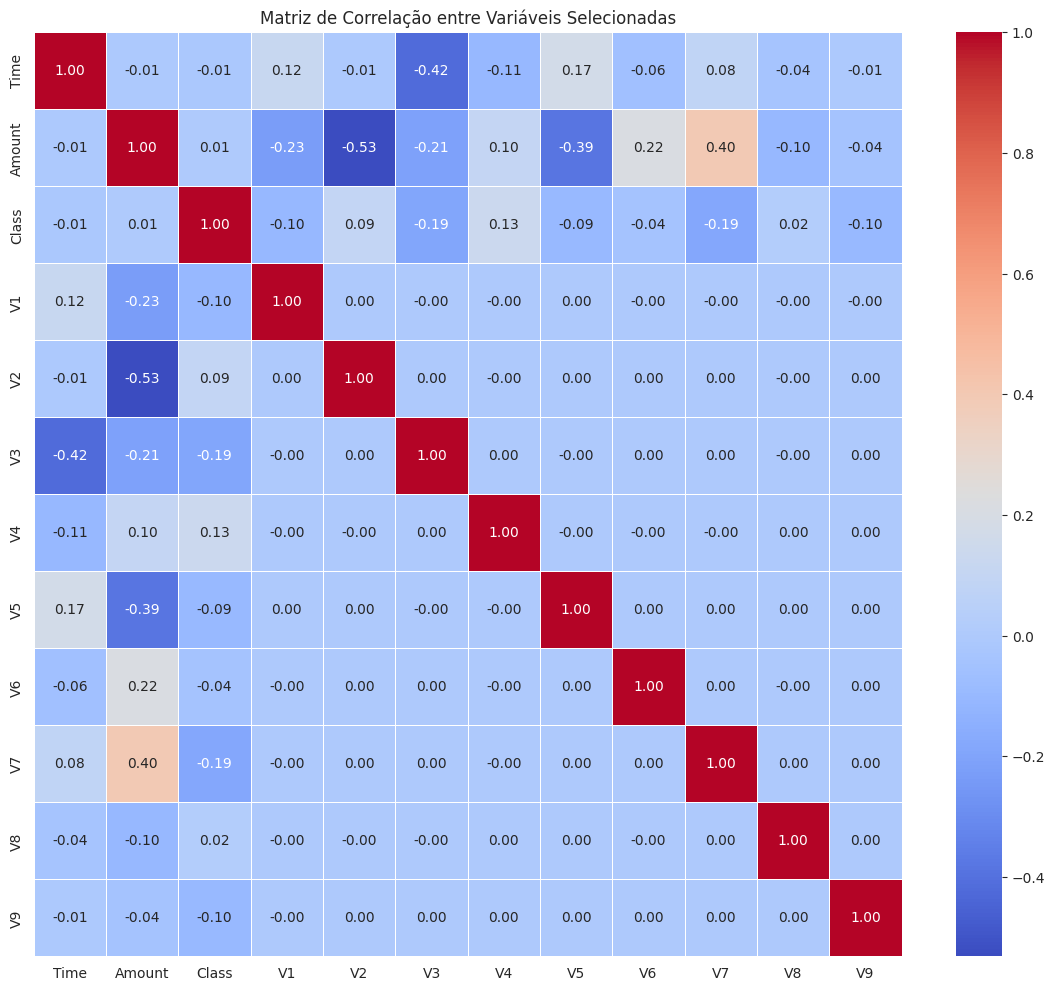

In [13]:
# Calculando a matriz de correlação (apenas para algumas variáveis para não sobrecarregar)
# Para um público menos técnico, podemos focar nas variáveis Time, Amount e Class
correlation_matrix = df[['Time', 'Amount', 'Class'] + [f'V{i}' for i in range(1, 10)]].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Selecionadas')
plt.show()

### 4. Pré-processamento dos Dados
Nesta etapa, prepararemos os dados para a modelagem. Isso inclui o tratamento de valores ausentes (se houver), normalização/padronização e a separação dos dados em conjuntos de treino e teste.

####4.1. Padronização das Variáveis 'Time' e 'Amount'
As variáveis 'Time' e 'Amount' possuem escalas muito diferentes das variáveis V1-V28. Para garantir que todas as variáveis contribuam igualmente para o modelo, vamos padronizá-las.

In [14]:
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time_Scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Remover as colunas originais 'Time' e 'Amount'
df_processed = df.drop(['Time', 'Amount'], axis=1)

print("\n--- Primeiras 5 linhas do dataset após padronização ---")
print(df_processed.head())


--- Primeiras 5 linhas do dataset após padronização ---
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26

### 4.2. Separação dos Dados em Treino e Teste
dividindo o dataset em dois conjuntos: um para treinar o modelo e outro para testá-lo. Isso garante que avaliemos o desempenho do modelo em dados que ele nunca viu antes,

**simulando um cenário real.**

In [15]:
X = df_processed.drop('Class', axis=1)
y = df_processed['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape}")
print(f"\nDistribuição das classes no conjunto de treino:\n{y_train.value_counts()}")
print(f"\nDistribuição das classes no conjunto de teste:\n{y_test.value_counts()}")


Tamanho do conjunto de treino (X_train): (227845, 30)
Tamanho do conjunto de teste (X_test): (56962, 30)

Distribuição das classes no conjunto de treino:
Class
0    227451
1       394
Name: count, dtype: int64

Distribuição das classes no conjunto de teste:
Class
0    56864
1       98
Name: count, dtype: int64


###4.3. Lidar com o Desequilíbrio de Classes
O desequilíbrio de classes é um dos maiores desafios neste projeto. Modelos treinados em dados desbalanceados tendem a ser tendenciosos para a classe majoritária (transações normais) e podem ter dificuldade em identificar a classe minoritária (transações fraudulentas).

Para resolver isso, aplica-se técnicas como **Oversampling** (SMOTE - Synthetic Minority Over-sampling Technique) na etapa de treino. O SMOTE cria novas amostras sintéticas da classe minoritária, ajudando a balancear o dataset sem simplesmente duplicar dados existentes.

In [16]:
print("\n--- Distribuição das classes ANTES do SMOTE (Conjunto de Treino) ---")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\n--- Distribuição das classes DEPOIS do SMOTE (Conjunto de Treino) ---")
print(y_train_resampled.value_counts())




--- Distribuição das classes ANTES do SMOTE (Conjunto de Treino) ---
Class
0    227451
1       394
Name: count, dtype: int64

--- Distribuição das classes DEPOIS do SMOTE (Conjunto de Treino) ---
Class
0    227451
1    227451
Name: count, dtype: int64


Agora, o conjunto de treino está balanceado, o que deve ajudar o modelo a aprender melhor os **padrões de transações fraudulentas**.

#### 5. Construção e Treinamento do Modelo
construir  e treinar diferentes modelos de classificação.

### 5.1. Regressão Logística
A Regressão Logística é um algoritmo de classificação simples, mas eficaz, que pode servir como uma boa linha de base.

In [17]:
print("\n--- Treinando o Modelo de Regressão Logística ---")
lr_model = LogisticRegression(solver='liblinear', random_state=42, n_jobs=-1, class_weight='balanced') # class_weight para dados desbalanceados
lr_model.fit(X_train_resampled, y_train_resampled)
print("Treinamento da Regressão Logística concluído.")


--- Treinando o Modelo de Regressão Logística ---


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.



Treinamento da Regressão Logística concluído.


### 5.2. Random Forest  (Floresta Aleatória)

**Explicação**

Random Forest é um algoritmo de ensemble (conjunto) que constrói múltiplas árvores de decisão e combina suas previsões. Geralmente, oferece bom desempenho e é robusto a ruídos.

In [18]:
print("\n--- Treinando o Modelo Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)
print("Treinamento do Random Forest concluído.")


--- Treinando o Modelo Random Forest ---
Treinamento do Random Forest concluído.


## 5.3. Gradient Boosting Classifier
Gradient Boosting é outro algoritmo de ensemble poderoso, que constrói árvores de decisão sequencialmente, corrigindo os erros das árvores anteriores.

In [23]:
print("\n--- Treinando o Modelo Gradient Boosting ---")
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)
print("Treinamento do Gradient Boosting concluído.")


--- Treinando o Modelo Gradient Boosting ---
Treinamento do Gradient Boosting concluído.


###6. Avaliação do Modelo
A avaliação do modelo é crucial para entender seu desempenho, especialmente em problemas de detecção de fraude onde o desequilíbrio de classes é significativo.

Utilizarei métricas que são mais informativas para esses casos, como a **Matriz de Confusão, Precisão, Recall, F1-Score e a Curva ROC.**

In [19]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n--- Avaliação do Modelo: {model_name} ---")

    # Relatório de Classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraude']))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Previsto Normal', 'Previsto Fraude'],
                yticklabels=['Real Normal', 'Real Fraude'])
    plt.title(f'Matriz de Confusão para {model_name}')
    plt.ylabel('Valores Reais')
    plt.xlabel('Valores Previstos')
    plt.show()

    # Curva ROC e AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo (False Positive Rate)')
    plt.ylabel('Taxa de Verdadeiro Positivo (True Positive Rate)')
    plt.title(f'Curva ROC para {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    return {
        'model_name': model_name,
        'accuracy': (cm[0,0] + cm[1,1]) / np.sum(cm),
        'precision_fraud': cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0,
        'recall_fraud': cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0,
        'f1_score_fraud': 2 * (cm[1,1] / (cm[1,1] + cm[0,1]) * cm[1,1] / (cm[1,1] + cm[1,0])) / \
                         ((cm[1,1] / (cm[1,1] + cm[0,1])) + (cm[1,1] / (cm[1,1] + cm[1,0]))) if \
                         ((cm[1,1] / (cm[1,1] + cm[0,1])) + (cm[1,1] / (cm[1,1] + cm[1,0]))) > 0 else 0,
        'auc': roc_auc
    }

## 6.1. Avaliando Regressão Logística


--- Avaliação do Modelo: Regressão Logística ---

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.99     56864
      Fraude       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



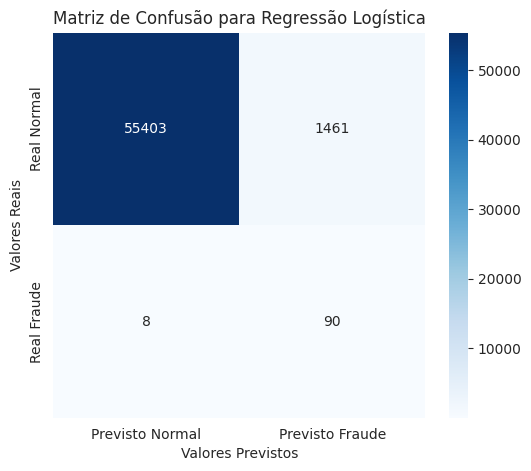

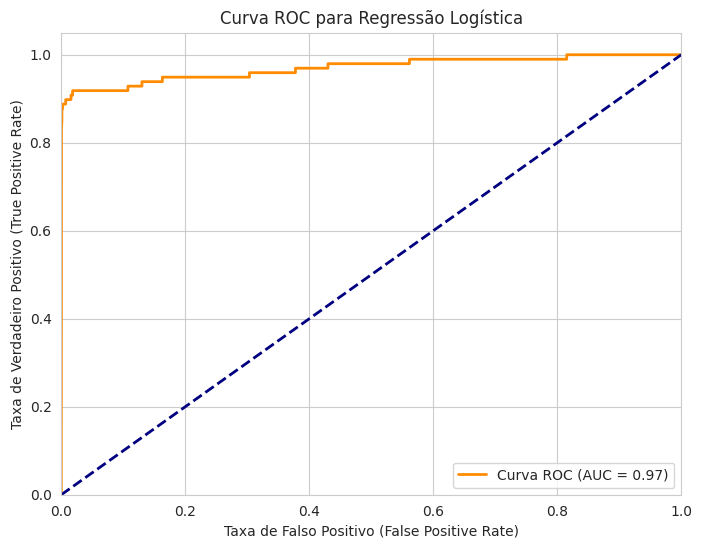

In [20]:
lr_results = evaluate_model(lr_model, X_test, y_test, "Regressão Logística")

### 6.2. Avaliando Random Forest


--- Avaliação do Modelo: Random Forest ---

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
      Fraude       0.81      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



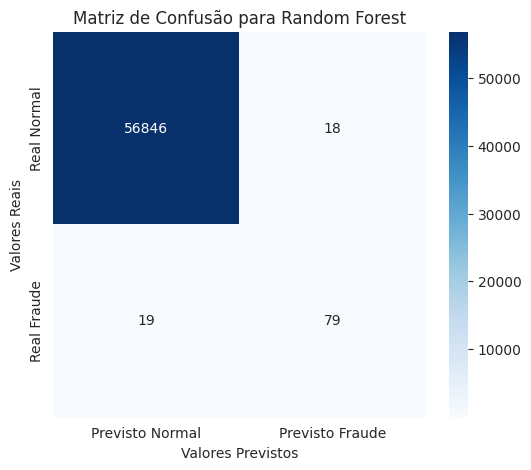

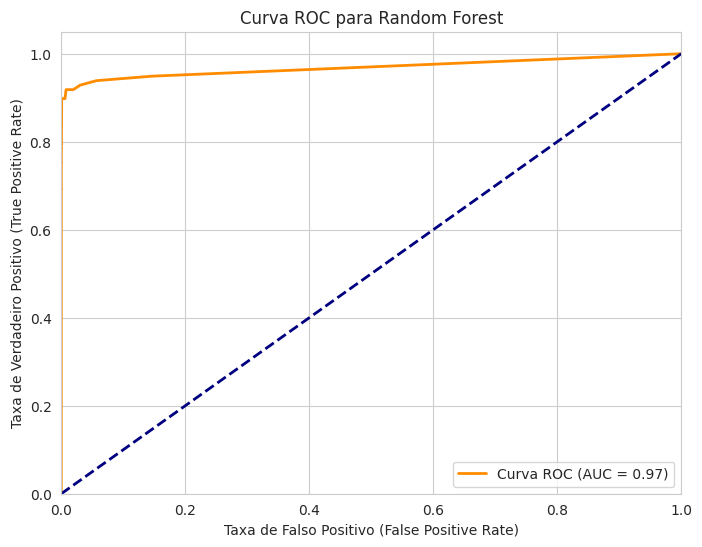

In [21]:
rf_results = evaluate_model(rf_model, X_test, y_test, "Random Forest")

## 6.3. Avaliando Gradient Boosting


--- Avaliação do Modelo: Gradient Boosting ---

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     56864
      Fraude       0.11      0.90      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.59     56962
weighted avg       1.00      0.99      0.99     56962



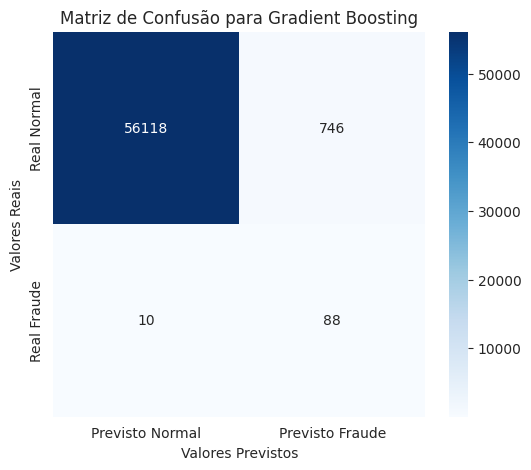

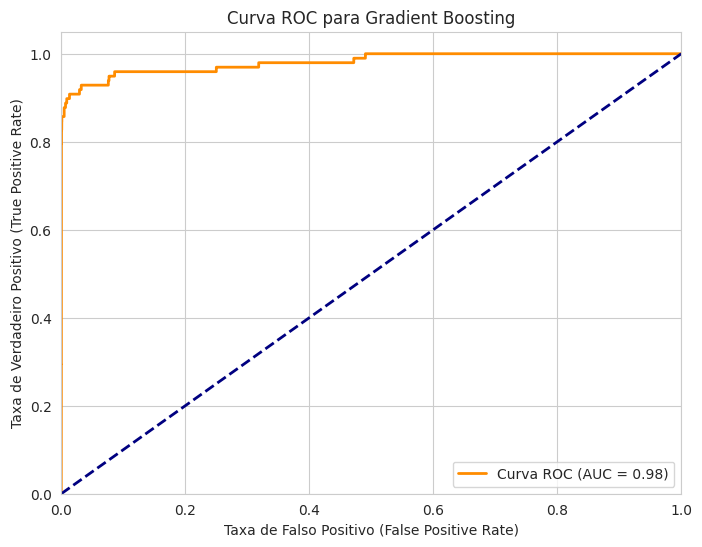

In [24]:
gb_results = evaluate_model(gb_model, X_test, y_test, "Gradient Boosting")

### 7. Comparativo de Modelos e Conclusão Final
resumo dos resultados dos modelos e apresentarei uma conclusão final, de forma acessível a um público menos técnico.

### 7.1. Resumo dos Resultados
Compilação das métricas mais importantes para cada modelo em uma tabela para facilitar a comparação.

In [25]:
results_df = pd.DataFrame([lr_results, rf_results, gb_results]).round(4)
print("\n--- Comparativo de Performance dos Modelos ---")
print(results_df[['model_name', 'accuracy', 'precision_fraud', 'recall_fraud', 'f1_score_fraud', 'auc']])

# Visualização de barras para as métricas principais
fig = go.Figure()
fig.add_trace(go.Bar(name='Precisão (Fraude)', x=results_df['model_name'], y=results_df['precision_fraud']))
fig.add_trace(go.Bar(name='Recall (Fraude)', x=results_df['model_name'], y=results_df['recall_fraud']))
fig.add_trace(go.Bar(name='F1-Score (Fraude)', x=results_df['model_name'], y=results_df['f1_score_fraud']))
fig.add_trace(go.Bar(name='AUC', x=results_df['model_name'], y=results_df['auc']))

fig.update_layout(barmode='group', title='Comparativo de Métricas Chave dos Modelos',
                  xaxis_title='Modelo', yaxis_title='Valor da Métrica')
fig.show()


--- Comparativo de Performance dos Modelos ---
            model_name  accuracy  precision_fraud  recall_fraud  \
0  Regressão Logística    0.9742           0.0580        0.9184   
1        Random Forest    0.9994           0.8144        0.8061   
2    Gradient Boosting    0.9867           0.1055        0.8980   

   f1_score_fraud     auc  
0          0.1092  0.9699  
1          0.8103  0.9688  
2          0.1888  0.9807  


### 7.2. O que as Métricas Significam? (Para um Público Menos Técnico)
**Acurácia (Accuracy):** Mostra a porcentagem total de previsões corretas. Em casos de fraude, onde temos poucas fraudes e muitas transações normais, uma alta acurácia pode ser enganosa, pois o modelo pode acertar muitas transações normais, mas errar a maioria das fraudes.

**Precisão (Precision)** para Fraudes: Das transações que o modelo previu como fraude, qual a porcentagem que realmente era fraude? Uma alta precisão significa menos "alertas falsos" de fraude.

**Recall (Sensibilidade)** para Fraudes: Das transações que realmente eram fraude, qual a porcentagem que o modelo conseguiu identificar? Um alto recall significa que o modelo é bom em "pegar" a maioria das fraudes.

**F1-Score** para Fraudes: É uma média que combina Precisão e Recall. É uma métrica muito útil quando temos desequilíbrio de classes, pois busca um bom equilíbrio entre não gerar muitos falsos alarmes (Precisão) e não deixar muitas fraudes passarem (Recall).

**AUC (Area Under the Curve)**: Indica a capacidade do modelo de distinguir entre transações normais e fraudulentas. Quanto mais próximo de 1, melhor o modelo consegue separar as duas classes.